# Bank Marketing Data Set 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
# % matplotlib inline

In [3]:
# Load Data
#data = pd.read_csv("bank-additional-full.csv")
data = pd.read_csv("bank-additional-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Label Encoding for Target Variable

In [4]:
c_y = {"y": {"yes": 1, "no": 0}}
data.replace(c_y, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Spliting Target Variable

In [6]:
data.columns!= "y"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [7]:
predictor= data.iloc[:, data.columns != 'y'] # X variables
target= data.iloc[:, data.columns == 'y'] # y variable

In [8]:
predictor.shape

(41188, 20)

In [9]:
target.shape

(41188, 1)

In [10]:
predictor.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype=object)

In [11]:
predictor['marital'].dtype == "object"

True

In [12]:
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

In [13]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

# One Hot Encoding for Categorical Variables

In [14]:
# save all categorical columns in list
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

# dataframe with categorical features
data_cat = predictor[categorical_columns]
# dataframe with numerical features
data_num = predictor.drop(categorical_columns, axis=1)

In [15]:
data_cat.shape

(41188, 10)

In [16]:
data_num.shape

(41188, 10)

In [17]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [18]:
data_cat_dummies.shape

(41188, 43)

In [19]:
data_cat_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [20]:
# using concat function we merging two dataframe for furthere analysis
predictor = pd.concat([data_num, data_cat_dummies], axis=1)

In [21]:
predictor.shape

(41188, 53)

In [22]:
predictor.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


# Spliting Dataset into Train & Test

In [23]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (28831, 53)
x_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


# Decision Tree Classifier

In [24]:
# Create decision tree classifier object using gini index
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

In [34]:
#help(DecisionTreeClassifier)

In [25]:
# Train model
model_DT = clf_DT.fit(x_train,y_train)

# Predicting the model
y_pred_DT = model_DT.predict(x_test)

In [26]:
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
model_DT.predict_proba(x_test)[::,1]

array([0., 0., 0., ..., 0., 0., 0.])

ROC Curve for Decision Tree Classifier

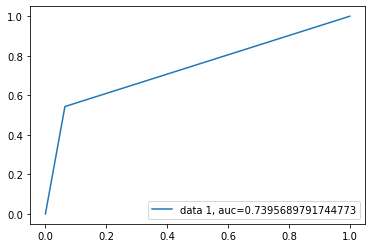

In [28]:
y_pred_proba = model_DT.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score',
        'Kappa Score']
models_report = pd.DataFrame(columns = cols)

In [30]:
models_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score


In [32]:
tmp2 = pd.Series({'Model': " Decision Tree with GINI ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT)})

model_dt1_report = models_report.append(tmp2, ignore_index = True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with GINI,0.739569,0.517502,0.543228,0.891802,0.468957


In [33]:
tmp2

Model               Decision Tree with GINI 
ROC Score                           0.739569
Precision Score                     0.517502
Recall Score                        0.543228
Accuracy Score                      0.891802
Kappa Score                         0.468957
dtype: object

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create random tree classifer object
clf_RF = RandomForestClassifier(random_state=0) # n_jobs=-1

In [47]:
#help(RandomForestClassifier)

In [ ]:
#clf_RF = RandomForestClassifier(random_state=0 ,n_jobs=-1)

In [35]:
# Train model
model_RF = clf_RF.fit(x_train,y_train)

# Predicting the model
y_pred_RF = model_RF.predict(x_test)

<ipython-input-35-68e9ebef1b1f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = clf_RF.fit(x_train,y_train)


ROC Curve of Random Forest Classifier

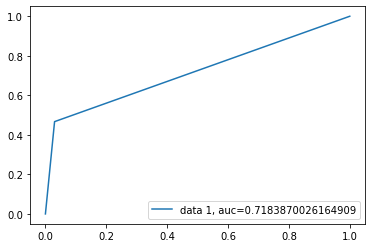

In [36]:
y_pred_proba = model_RF.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_RF)
auc = metrics.roc_auc_score(y_test, y_pred_RF)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#metrics.roc_auc_score(y_test, y_pred_RF)


In [50]:
#metrics.roc_auc_score(y_test, y_pred_RF)

In [51]:
#metrics.roc_auc_score(y_test, y_pred_RF)

In [37]:
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)})

model_rf1_report = models_report.append(tmp3, ignore_index = True)
model_rf1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier,0.718387,0.662577,0.466859,0.913409,0.501466


# Feature Importance

In [38]:
model_RF.feature_importances_

array([8.61493240e-02, 2.90059604e-01, 4.14175982e-02, 2.83246172e-02,
       1.58931561e-02, 2.23902562e-02, 2.42767290e-02, 2.66251176e-02,
       1.04564136e-01, 4.86162563e-02, 9.13285477e-03, 4.18638397e-03,
       3.59919699e-03, 7.80485471e-03, 6.21496426e-03, 4.39433938e-03,
       6.93310055e-03, 4.53684529e-03, 1.14458991e-02, 4.14614807e-03,
       1.65834236e-03, 1.35064713e-02, 1.21778647e-02, 4.51027828e-04,
       4.64859634e-03, 8.15597468e-03, 1.21077743e-02, 1.86395124e-04,
       8.79387044e-03, 1.29106972e-02, 4.98787664e-03, 8.62853305e-03,
       0.00000000e+00, 2.22693878e-03, 2.00816950e-02, 2.20535113e-03,
       1.33827045e-02, 1.01323102e-02, 2.46422942e-03, 9.34196764e-04,
       2.82487753e-03, 2.80997536e-03, 4.82408621e-03, 6.28685957e-03,
       2.42220557e-03, 5.89873044e-03, 2.72376805e-03, 1.19760734e-02,
       1.24113035e-02, 1.19291171e-02, 1.15403095e-02, 8.71536468e-03,
       2.52850983e-02])

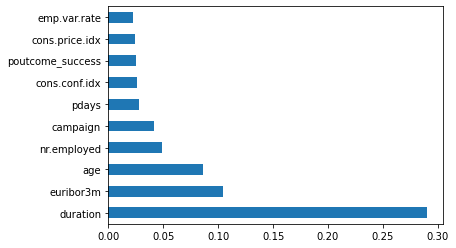

In [39]:
(pd.Series(model_RF.feature_importances_, index=predictor.columns)
   .nlargest(10)
   .plot(kind='barh'))  ;

Based on Random Forest Model the important variables are duration, euribor3m, age and campaign

# Tuning the hyper-parameters of an estimator
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. For example "Number of features", "regularization" as hyperparameter.

# GridSearchCV

GridSearchCV shows how a classifier is optimized by cross-validation.

When the grid search is called with various parameters, it chooses the one with the highest score based on the given Random Forest model. 'best_params_' gives the information of the parameters that resulted in the highest score. 

In [41]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [40]:
# set of parameters to test
param_grid = {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],'max_features': ['auto', 'sqrt', 'log2']}

In [41]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv= 5)

In [42]:
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

{'max_features': 'auto', 'n_estimators': 10}


Based on GridSearch the best parameters to consider for 'max_features' is 'auto' and for 'n_estimators' is 10.

# Randomized Search Cross Validation

Using RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold cross validation with each combination of values. "GridSearchCV" exhaustively considers all parameter combinations, while "RandomizedSearchCV" can sample given number of candidates from a parameter space with a specified distribution.

In [43]:
np.linspace(start = 10, stop = 500, num = 50)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250., 260., 270., 280., 290., 300., 310., 320., 330.,
       340., 350., 360., 370., 380., 390., 400., 410., 420., 430., 440.,
       450., 460., 470., 480., 490., 500.])

In [44]:
[int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]

[1, 2, 3, 4, 5]

In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]# 1,2,3,4,5,( start = 10, stop 500, num = 50)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [46]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_RF, param_distributions = random_grid,n_iter = 10, cv = 3,random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sonal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 3, 4, 5]},
                   random_state=42)

We can have a look at the best parameters by fitting the random search:

In [47]:
rf_random.best_params_

{'n_estimators': 1,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

SyntaxError: invalid syntax (<ipython-input-48-816504e8de0c>, line 1)

In [51]:
print(rf_random.best_score_)
print(rf_random.best_estimator_)

0.9011132968412993
RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1, random_state=0)


In [50]:
best_model.feature_importances_

NameError: name 'best_model' is not defined

In [52]:
predictor.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [77]:
#sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_),predictor.columns),reverse=True)

In [53]:
best_model = rf_random.best_estimator_
best_model.fit(x_train, y_train)

importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), predictor.columns),reverse=True)

<ipython-input-53-4c682b213069>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train, y_train)


In [79]:
#importance

<ipython-input-54-ca2b65a006c7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train, y_train)


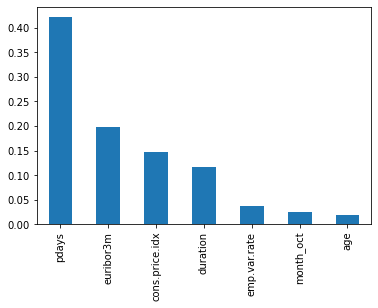

In [54]:
best_model = rf_random.best_estimator_
best_model.fit(x_train, y_train)

importance = sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), predictor.columns),reverse=True)

y_val = []
x_val = [x[0] for x in importance]

for x in importance:
    y_val.append(x[1])
    
pd.Series(x_val,index=y_val)[:7].plot(kind='bar')
plt.show();

Based on random search model the important variables are pdays, euribor3m, cons.price.idx, duration, month_oct and age

# Bagging Classifier


BaggingClassifier is a Sci-kit learn's implementation of bagging ensemble which accepts as an input the designation of a base classifier which the bagging ensemble will replicate n times.These methods are used as a way to reduce the variance of a base estimator, by introducing randomization into its construction procedure and then making an ensemble out of it.

As they provide a way to reduce overfitting, bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

In [55]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(best_model, random_state=1)
bagging.fit(x_train, y_train)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                        max_features='sqrt',
                                                        min_samples_leaf=4,
                                                        min_samples_split=10,
                                                        n_estimators=1,
                                                        random_state=0),
                  random_state=1)

In [56]:
test_pred_bag = bagging.predict(x_test)

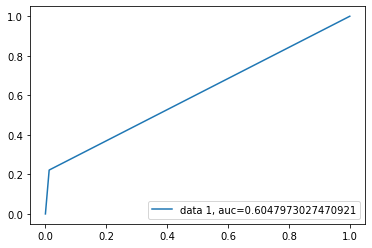

In [57]:
y_pred_proba = bagging.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_bag)
auc = metrics.roc_auc_score(y_test, test_pred_bag)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
test_pred_bag = bagging.predict(x_test)

tmp2 = pd.Series({'Model': " Random Forest with BaggingClassifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_bag)})

model_bag_report = models_report.append(tmp2, ignore_index = True)
model_bag_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest with BaggingClassifier,0.604797,0.69526,0.221902,0.901675,0.298288


# Adaboost Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [88]:
#help(AdaBoostClassifier)

In [59]:
# Create adaboost-decision tree classifer object
clf_ABC1 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)

In [60]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

C:\Users\sonal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# ROC Curve

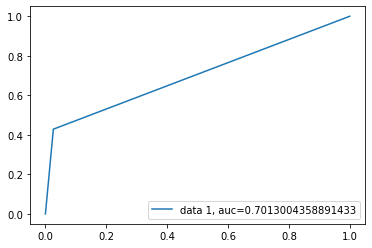

In [61]:
y_pred_proba = clf_ABC1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ABC1)
auc = metrics.roc_auc_score(y_test, y_pred_ABC1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_ABC1),
                 'Precision Score': metrics.precision_score(y_test, y_pred_ABC1),
                 'Recall Score': metrics.recall_score(y_test, y_pred_ABC1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_ABC1),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_ABC1)})

model_abc1_report = models_report.append(tmp1, ignore_index = True)
model_abc1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.7013,0.675369,0.428674,0.912681,0.479017


In [63]:
# Comparison of Random Forest based on criterion and max_features

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model_abc1_report,model_rf1_report,model_bag_report,model_dt1_report], ignore_index = True)
model_rf

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.701300,0.675369,0.428674,0.912681,0.479017
1,Random Forest Classifier,0.718387,0.662577,0.466859,0.913409,0.501466
2,Random Forest with BaggingClassifier,0.604797,0.695260,0.221902,0.901675,0.298288
3,Decision Tree with GINI,0.739569,0.517502,0.543228,0.891802,0.468957


In [64]:
metrics.f1_score(y_test, y_pred_ABC1)

0.5244601145879241